In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
X_train = pd.read_csv("Logistic_X_Train.csv").values
Y_train = pd.read_csv("Logistic_Y_Train.csv").values
test = pd.read_csv("Logistic_X_Test.csv")

In [134]:
print(X_train.shape,Y_train.shape)

(3000, 3) (3000, 1)


In [135]:
print(Y_train)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [136]:
def hypothesis(x,w,b):
    h = np.dot(x,w) + b
    return sigmoid(h)
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))
def error(y_true,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += (y_true[i]*np.log(hx))+((1-y_true[i])*np.log(1-hx))
    return -err/m
def get_gradient(y_true,x,w,b):
    grad_w = np.zeros((w.shape))
    grad_b = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y_true[i]-hx)*x[i]
        grad_b += (y_true[i]-hx)
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]
def grad_descent(x,y_true,w,b,lr = 0.1):
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_gradient(y_true,x,w,b)
    w = w+lr*grad_w
    b = b+lr*grad_b
    return err,w,b
def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if confidence  < 0.5:
        return 0
    else:
        return 1
def get_acc(x_tst,y_tst,w,b):
    y_pred = []
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
    y_pred = np.array(y_pred)
    return float((y_pred == y_tst).sum())/y_tst.shape[0]

In [137]:
loss = []
#w = 2*np.random.random((X_train.shape[1],))
#b = 5*np.random.random()
#print(w)
w = np.zeros((X_train.shape[1],))
b = 0.0
print(w.shape)

(3,)


In [146]:
for i in range(400):
    l,w,b = grad_descent(X_train,Y_train,w,b,0.1)
    loss.append(l)

In [147]:
print(loss)

[array([0.69314718]), array([0.68812612]), array([0.68317242]), array([0.67828513]), array([0.67346325]), array([0.66870585]), array([0.66401196]), array([0.65938064]), array([0.65481095]), array([0.65030196]), array([0.64585277]), array([0.64146245]), array([0.6371301]), array([0.63285485]), array([0.62863581]), array([0.62447211]), array([0.62036288]), array([0.6163073]), array([0.6123045]), array([0.60835368]), array([0.60445401]), array([0.60060469]), array([0.59680493]), array([0.59305394]), array([0.58935095]), array([0.5856952]), array([0.58208595]), array([0.57852245]), array([0.57500398]), array([0.57152982]), array([0.56809927]), array([0.56471164]), array([0.56136624]), array([0.5580624]), array([0.55479946]), array([0.55157677]), array([0.54839368]), array([0.54524958]), array([0.54214384]), array([0.53907585]), array([0.53604502]), array([0.53305076]), array([0.53009248]), array([0.52716962]), array([0.52428163]), array([0.52142794]), array([0.51860803]), array([0.51582137

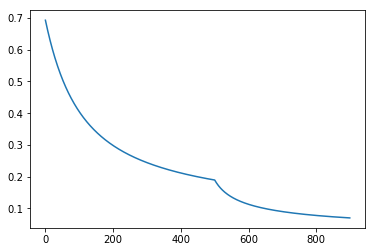

In [148]:
plt.plot(loss)

In [141]:
w,b

(array([-0.59596142,  0.08531048, -0.6037877 ]), array([-0.01915221]))

In [82]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
def predictY(x,theta):
    return sigmoid(np.dot(x,theta)) 
def predict(x,theta):
    hyp = predictY(x,theta)
    outputs = np.zeros((hyp.shape))
    outputs[hyp>0.5]=1
    return outputs


def error(x,y,theta):
    m=x.shape[0]
    hyp = predictY(x,theta)
    error  = -1*(np.sum(y*np.log(hyp) + (1-y)*np.log(1-hyp)))
    return error/m
               
def getGrad(x,y,theta):
    hyp = predictY(x,theta)
    grad  = np.dot(x.T,(y-hyp))
    return grad



def gradientDescent(x,y,lr,maxItr):
    error_list = []
    theta = np.zeros([x.shape[1],1])
    for i in range(maxItr):
        grad = getGrad(x,y,theta)
        err = error(x,y,theta)
        error_list.append(err)
        theta = theta + lr*grad
    return theta,error_list


In [97]:
theta,error_list = gradientDescent(X_train,Y_train,0.01,100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


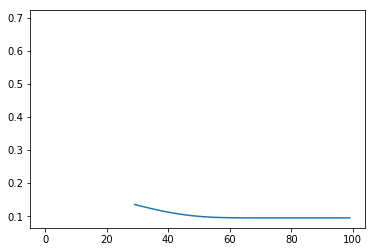

In [98]:
plt.plot(error_list)

In [99]:
theta

array([[-1.85376332],
       [ 1.35390596],
       [-4.01648952]])

In [101]:
X_train1= (X_train-X_train.mean())/X_train.std()


In [130]:
ones  = np.ones([X_train.shape[0],1])
X_train1 = np.hstack((ones,X_train1))
one = np.ones([test.shape[0],1])
test = np.hstack((one,test))

In [123]:
theta,error_list = gradientDescent(X_train1,Y_train,0.01,200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


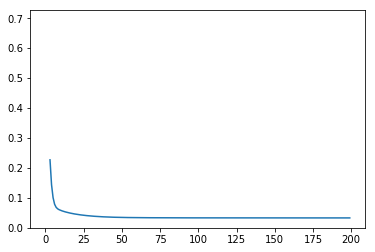

In [124]:
plt.plot(error_list)

In [131]:
out = predict(test,theta)
np.savetxt("chem.csv",out,delimiter=" ",fmt = '%f')

In [142]:
theta

array([[-6.21764356],
       [-5.85251174],
       [ 4.77431753],
       [-3.06635852]])